# YouTube Video Titles & Their Influence Over Views
### Team Members: Sai Bharath Bobba, Jagadeesh Chandrabose Gurram, Dillon Price, Rohit Raju, Ankit Rai Sharma & Punitha Vancha


## Importing essential libraries

In [ ]:
#importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
import plotly.express as px
import plotly.io as pio


## Importing data

In [ ]:
#data
df = pd.read_csv('./Youtube_Data_New.csv')
df.head()

,Unnamed: 0,Channel_ID,Video_ID,Title,Title_Length,Upload_Date,Video_Category,Views
0,0,UCTCpOFIu6dHgOjNJ0rTymkQ,uk-LXRElCL0,Dippin&#39; Dots Frozen Dot Maker: Does It Rea...,75,2023-08-01,Howto & Style,382287
1,1,UCTCpOFIu6dHgOjNJ0rTymkQ,_3LJPPUwUkE,Temu vs Wish: Which Deal Site is Better?,40,2023-07-17,Howto & Style,312093
2,2,UCTCpOFIu6dHgOjNJ0rTymkQ,RmL24TYkSRI,Testing Temu vs Amazon Outdoor Fireworks Lights!,48,2023-07-08,Howto & Style,63692
3,3,UCTCpOFIu6dHgOjNJ0rTymkQ,08jryj_fdzQ,Testing a $180 Smart Cutting Board Set,38,2023-07-05,Howto & Style,276791
4,4,UCTCpOFIu6dHgOjNJ0rTymkQ,iUMKkDgnaOY,Testing 3 Ridiculously Simple Kitchen Gadgets!,46,2023-06-29,Howto & Style,179815


## Exploratory data analysis

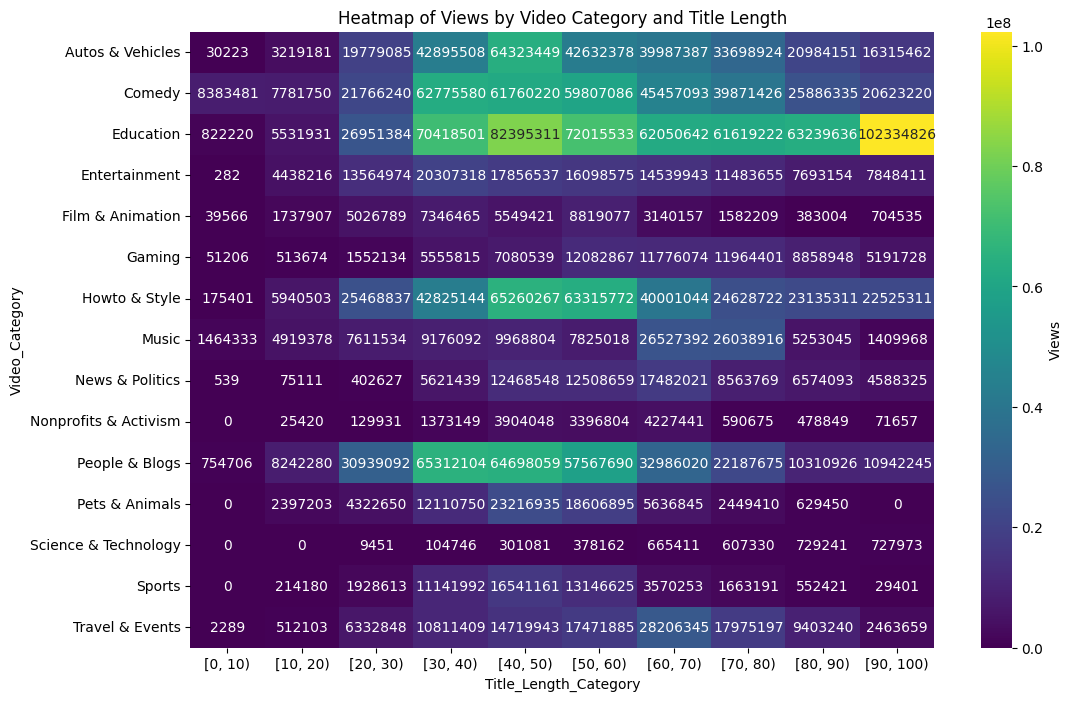

In [ ]:
#heatmap
df['Title_Length_Category'] = pd.cut(df['Title_Length'], bins=range(0, 110, 10), right=False)
heatmap_data = df.pivot_table(index='Video_Category', columns='Title_Length_Category', values='Views', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f", cbar_kws={'label': 'Views'})
plt.title('Heatmap of Views by Video Category and Title Length')
plt.show()


In [ ]:
pio.templates.default = 'plotly_white+presentation'

#bar graph of each video category
vol = df.groupby('Video_Category').Video_ID.nunique().reset_index().sort_values(by='Video_ID', ascending=False)
vol_fig = px.bar(vol,
                 x='Video_Category',
                 y='Video_ID',
                 title='# of Videos by Category',
                 labels={'Video_Category':'Category', 'Video_ID':'Count'},
                 height=800,
                 width=1000
                )
vol_fig.show()

#histogram of title length
len_fig = px.histogram(df, x='Title_Length', nbins=14, height=800, width=1000, labels={'Title_Length':'Length (bins)'}, title='Title Length Histogram')
len_fig.show()

#scatter plot of views in each category
views_counts = df.groupby('Video_Category').agg({'Views':'sum','Video_ID':'count'}).reset_index().rename(columns={'Video_Category':'Category','Views':'Total Views', 'Video_ID':'Count of Videos'})
vc_fig = px.scatter(views_counts,
                    x='Count of Videos',
                    y='Total Views',
                    color='Category',
                    height=800,
                    width=1000,
                    title='Total Views vs Video Counts by Category',
                    color_discrete_sequence=px.colors.qualitative.Bold
                   )
vc_fig.show()

#scatter plot of Total views and video counts by length
df['Title_Length_Category'] = pd.cut(df['Title_Length'], bins=range(0, 110, 10), right=False).astype('str')
tmp = df[df.Title_Length_Category != 'nan'].copy()
length_cnts = tmp.groupby('Title_Length_Category').agg({'Views':'sum','Video_ID':'count'}).reset_index().rename(columns={'Title_Length_Category':'Length (bins)','Views':'Total Views', 'Video_ID':'Count of Videos'})
lc_fig = px.scatter(length_cnts,
                   x='Count of Videos',
                   y='Total Views',
                   title='Total Views vs Video Counts by Length (bins)',
                   height=800,
                   width=1000,
                    color='Length (bins)',
                   # color_discrete_sequence=px.colors.qualitative.Safe
                   )
lc_fig.show()

## Hypothesis Testing

### Hypothesis test 1

<ipython-input-16-ae507da9802e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-ae507da9802e>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



T value:  18.457512645485 P value:  1.445779122046928e-75


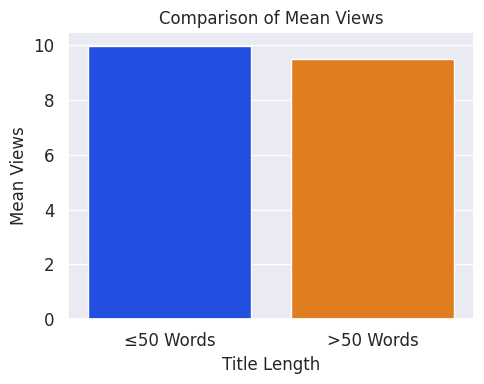

In [ ]:
#Categoring the dataset into two different datasets
short_titles = df[df["Title_Length"] <= 50]
long_titles = df[df["Title_Length"]  > 50]

#Log normalizing both the datasets
short_titles['log_views'] = np.log(short_titles["Views"])
long_titles['log_views'] = np.log(long_titles["Views"])

#Performing t-test and findinding out the p-value
tstat, pval = stats.ttest_ind(short_titles["log_views"], long_titles["log_views"], equal_var=False)
print('T value: ', tstat, 'P value: ', pval)
means = [short_titles["log_views"].mean(), long_titles["log_views"].mean()]

#ploting the result
labels = ["≤50 Words", ">50 Words"]
x = np.arange(len(labels))

sns.set_theme(style="darkgrid")

ax = sns.barplot(x=x, y=means, palette="bright")
ax.set(xlabel='Title Length', ylabel='Mean Views')
ax.set_title('Comparison of Mean Views')

ax.tick_params(width=1.5)
sns.set(rc={'figure.figsize':(5,4)})

plt.xticks(x, labels, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Hypothesis test 2

<ipython-input-13-2980d5786b2d>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-13-2980d5786b2d>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



T value:  13.816020586970003 P value:  7.061647961520628e-43


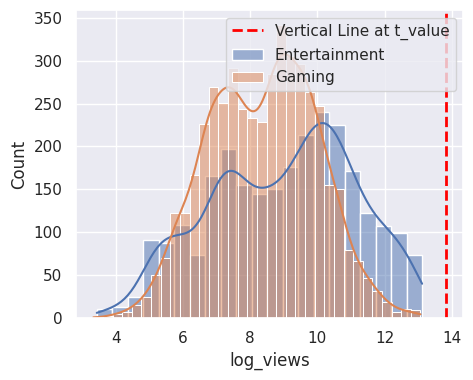

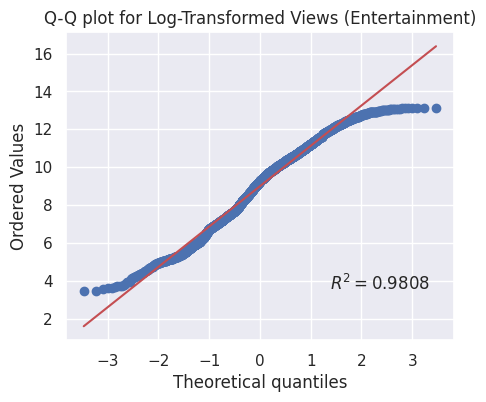

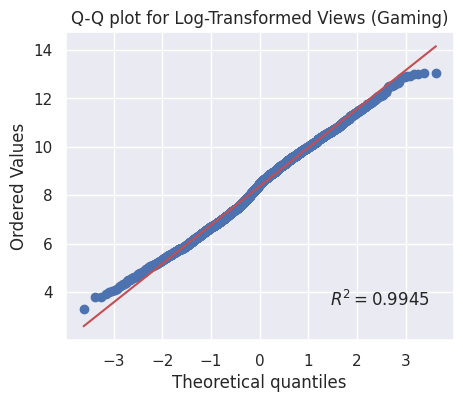

In [ ]:
#Entertainment data
Entertainment_data=df[df['Video_Category']=='Entertainment']

#Gaming data
gaming_data=df[df['Video_Category']=='Gaming']


#Pre-processing data
Entertainment_data["log_views"] = np.log(Entertainment_data["Views"])
gaming_data["log_views"] = np.log(gaming_data["Views"])

#Conducting T test
t_value, p_value = stats.ttest_ind(Entertainment_data["log_views"], gaming_data["log_views"], equal_var=True)
print('T value: ', t_value, 'P value: ', p_value)

#Plotting the findings
sns.histplot(Entertainment_data["log_views"], kde=True, label="Entertainment")
sns.histplot(gaming_data["log_views"], kde=True, label="Gaming")
plt.axvline(t_value, color='red', linestyle='dashed', linewidth=2,label='Vertical Line at t_value')
plt.legend()
plt.show()

stats.probplot(Entertainment_data["log_views"], plot=plt, fit=True, rvalue=True)
plt.title('Q-Q plot for Log-Transformed Views (Entertainment)')
plt.show()

stats.probplot(gaming_data["log_views"], plot=plt, fit=True, rvalue=True)
plt.title('Q-Q plot for Log-Transformed Views (Gaming)')
plt.show()

### Hypothesis test 3

<ipython-input-14-ffe8e2f9cb9b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-ffe8e2f9cb9b>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



T value:  10.498708659574675 P value:  1.3292477653686485e-25


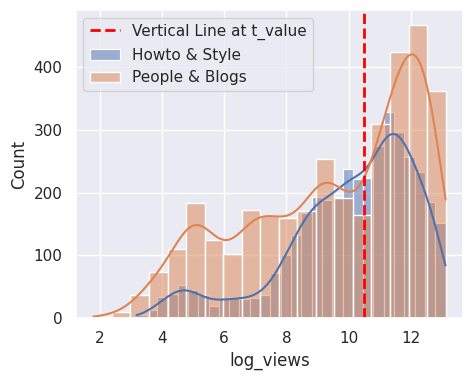

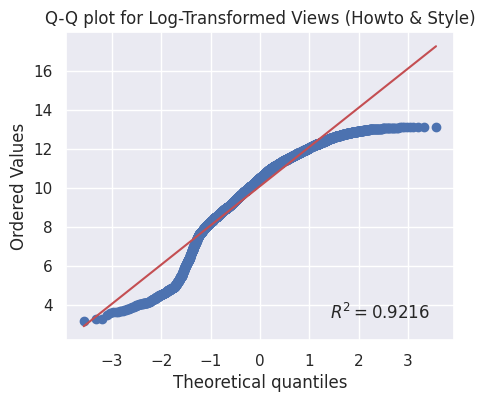

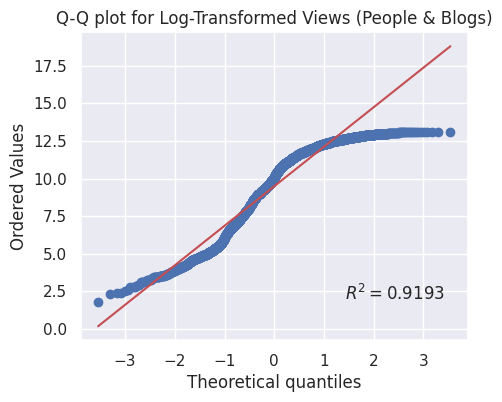

In [ ]:
#Howto & Style
how_to_style=df[df['Video_Category']=='Howto & Style']

#People & Blogs
people_blogs=df[df['Video_Category']=='People & Blogs']

#Pre-processing data
how_to_style["log_views"] = np.log(how_to_style["Views"])
people_blogs["log_views"] = np.log(people_blogs["Views"])

#Conducting T test
t_value, p_value = stats.ttest_ind(how_to_style["log_views"], people_blogs["log_views"], equal_var=True)
print('T value: ', t_value, 'P value: ', p_value)


#Plotting the findings
sns.histplot(how_to_style["log_views"], kde=True, label="Howto & Style")
sns.histplot(people_blogs["log_views"], kde=True, label="People & Blogs")
plt.axvline(t_value, color='red', linestyle='dashed', linewidth=2,label='Vertical Line at t_value')
plt.legend()
plt.show()

stats.probplot(how_to_style["log_views"], plot=plt, fit=True, rvalue=True)
plt.title('Q-Q plot for Log-Transformed Views (Howto & Style)')
plt.show()

stats.probplot(people_blogs["log_views"], plot=plt, fit=True, rvalue=True)
plt.title('Q-Q plot for Log-Transformed Views (People & Blogs)')
plt.show()